#**1. Introducción y Objetivos**

__Contexto__

Este análisis explora datos de arriendos de departamentos en la Región Metropolitana de Chile, extraídos desde Yapo.cl en mayo de 2025. El objetivo es identificar patrones de precios, distribución geográfica y relaciones entre variables como metros cuadrados, dormitorios y ubicación.

**Objetivos**

- Limpiar y normalizar los datos para análisis.
- Explorar distribuciones de precios y características de los departamentos.
- Identificar las comunas con mayor oferta y precios promedio.
- Analizar relaciones entre variables (ej: precio vs. metros cuadrados).
- Generar insights para posibles arrendatarios o inversionistas.

#**2. Carga de Datos**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('apartments_rm_raw_yapo_may2025.csv')
df.head()

,Título,Comuna,Precio,Metros Cuadrados,Dormitorios,Baños,Estacionamientos
0,ArriendoDepto1D/50%DCTO/1ERMESGRATISGC/Garantí...,EstaciónCentral,$260.000-4%,NaN,1.0,1.0,NaN
1,Depto.2D+1B+E+B/50%DCTO/1ERMESGRATISGC/Garantí...,EstaciónCentral,$340.000-3%Oportunidad,NaN,2.0,1.0,1
2,TRESDORMITORIOSUNBAÑOYBODEGAyDOSDORMITORIOSDIS...,EstaciónCentral,$450.000-6%,65m2,3.0,2.0,NaN
3,"DEPARTAMENTOThompson4225,EstaciónCentral",EstaciónCentral,$295.000,32m2,1.0,1.0,NaN
4,DEPARTAMENTOZañartu980,Ñuñoa,$379.968,37m2,1.0,1.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Título            12690 non-null  object 
 1   Comuna            12690 non-null  object 
 2   Precio            12683 non-null  object 
 3   Metros Cuadrados  8486 non-null   object 
 4   Dormitorios       12552 non-null  float64
 5   Baños             12649 non-null  float64
 6   Estacionamientos  3113 non-null   object 
dtypes: float64(2), object(5)
memory usage: 694.1+ KB


 # **3. Normalización de Formatos**

Al revisar los datos, se observa una variedad de formatos que requieren limpieza, especialmente en la columna de precios. Algunos valores están expresados en pesos chilenos (CLP) junto a texto adicional, mientras que otros incluyen un guion que separa el precio de una descripción. También hay precios en UF y errores de registro, como valores del tipo "UF500.000", que probablemente fueron ingresados en UF cuando en realidad correspondían a montos en pesos. Para realizar análisis confiables, es necesario limpiar y estandarizar esta columna, convirtiéndola a un formato numérico homogéneo.
Del mismo modo, se aplican transformaciones a los valores de superficie (metros cuadrados) y de cantidad de estacionamientos, ya que también presentan inconsistencias o están registrados como texto.

In [ ]:
# Elimina lo que haya despues del - para dejar solo los precios
df['Precio'] = df['Precio'].str.split('-').str[0]
df['Precio'] = df['Precio'].str.replace(r'(\d{3})\w+', r'\1', regex=True)


In [ ]:
# Se deja solo los valores que terminan con tres digitos y se saca lo demas ( hay valores del tipo $350.000Oportunidad)
df['Precio'] = df['Precio'].str.replace(r'(\d{3})\w+', r'\1', regex=True)
df

,Título,Comuna,Precio,Metros Cuadrados,Dormitorios,Baños,Estacionamientos
0,ArriendoDepto1D/50%DCTO/1ERMESGRATISGC/Garantí...,EstaciónCentral,$260.000,NaN,1.0,1.0,NaN
1,Depto.2D+1B+E+B/50%DCTO/1ERMESGRATISGC/Garantí...,EstaciónCentral,$340.000,NaN,2.0,1.0,1
2,TRESDORMITORIOSUNBAÑOYBODEGAyDOSDORMITORIOSDIS...,EstaciónCentral,$450.000,65m2,3.0,2.0,NaN
3,"DEPARTAMENTOThompson4225,EstaciónCentral",EstaciónCentral,$295.000,32m2,1.0,1.0,NaN
4,DEPARTAMENTOZañartu980,Ñuñoa,$379.968,37m2,1.0,1.0,NaN
...,...,...,...,...,...,...,...
12685,"Arriendodepto1d+1b+1e,macul",Macul,$400.000,40m2,1.0,1.0,1
12686,Departamentopequeño,SanJoaquín,UF270.000,NaN,1.0,1.0,NaN
12687,Doyenarriendodepartamento2piso,LaGranja,$250.000,36m2,2.0,1.0,NaN
12688,Arriendodepartamento1ambienteMetroMoneda,Santiago,$247.500,30m2,1.0,1.0,NaN


In [ ]:
# Ahora revisamos que pasa con los valores de UF
df[df['Precio'].astype(str).str.startswith('UF')]

,Título,Comuna,Precio,Metros Cuadrados,Dormitorios,Baños,Estacionamientos
34,ARRIENDODEPARTAMENTO2D+2B+1BODEGA+ESTACIONAMIENTO,Santiago,UF587.000,59m2,2.0,2.0,Más
116,MaríaLuisaSantander/Condell/FullAmoblado,Providencia,UF30,64m2,2.0,2.0,1
118,DepartamentoenDomingoFaustinoSarmiento,Ñuñoa,UF15,36m2,1.0,1.0,1
127,DepartamentoenDomingoFaustinoSarmiento,Ñuñoa,UF15,36m2,1.0,1.0,1
206,ARRIENDOHERMOSODEPARTAMENTOSANTIAGOCENTRO,Santiago,UF680.000,NaN,3.0,2.0,1
...,...,...,...,...,...,...,...
12597,OfrezcoDepartamentoFrenteCampusSanJoaquinUC,SanJoaquín,UF14,55m2,2.0,2.0,NaN
12639,Arriendodepartamento,LaReina,UF23,NaN,2.0,2.0,1
12668,Arriendodepartamentosantiagocentro,QuintaNormal,UF13,NaN,3.0,1.0,NaN
12679,Hermosodepartamento,SanMiguel,UF10,38m2,1.0,1.0,NaN


In [ ]:
# Verificamos categoria del precio, si es que es UF o CLP
df['Precio_UF'] = df['Precio'].str.contains('UF', na=False)
df['Precio_CLP'] = df['Precio'].str.contains('\$', na=False)

# Limpiar caracteres y convertir a float
df['Precio_Limpio'] = df['Precio'].str.replace(r'[^\d.,]', '', regex=True)
df['Precio_Limpio'] = df['Precio_Limpio'].str.replace('.', '', regex=False)  # elimina puntos de miles
df['Precio_Limpio'] = df['Precio_Limpio'].str.replace(',', '.', regex=False)  # reemplaza comas por puntos

df['Precio_Limpio'] = df['Precio_Limpio'].str.replace(',', '.').astype(float)
df

,Título,Comuna,Precio,Metros Cuadrados,Dormitorios,Baños,Estacionamientos,Precio_UF,Precio_CLP,Precio_Limpio
0,ArriendoDepto1D/50%DCTO/1ERMESGRATISGC/Garantí...,EstaciónCentral,$260.000,NaN,1.0,1.0,NaN,False,True,260000.0
1,Depto.2D+1B+E+B/50%DCTO/1ERMESGRATISGC/Garantí...,EstaciónCentral,$340.000,NaN,2.0,1.0,1,False,True,340000.0
2,TRESDORMITORIOSUNBAÑOYBODEGAyDOSDORMITORIOSDIS...,EstaciónCentral,$450.000,65m2,3.0,2.0,NaN,False,True,450000.0
3,"DEPARTAMENTOThompson4225,EstaciónCentral",EstaciónCentral,$295.000,32m2,1.0,1.0,NaN,False,True,295000.0
4,DEPARTAMENTOZañartu980,Ñuñoa,$379.968,37m2,1.0,1.0,NaN,False,True,379968.0
...,...,...,...,...,...,...,...,...,...,...
12685,"Arriendodepto1d+1b+1e,macul",Macul,$400.000,40m2,1.0,1.0,1,False,True,400000.0
12686,Departamentopequeño,SanJoaquín,UF270.000,NaN,1.0,1.0,NaN,True,False,270000.0
12687,Doyenarriendodepartamento2piso,LaGranja,$250.000,36m2,2.0,1.0,NaN,False,True,250000.0
12688,Arriendodepartamento1ambienteMetroMoneda,Santiago,$247.500,30m2,1.0,1.0,NaN,False,True,247500.0


In [ ]:
# Asumimos que si hay un valor en UF > 100.000, en realidad debió ser en CLP
df.loc[df['Precio_UF'] & (df['Precio_Limpio'] > 100000), 'Precio_UF'] = False
df.loc[df['Precio_UF'] & (df['Precio_Limpio'] > 100000), 'Precio_CLP'] = True

UF_TO_CLP = 39184  # actualizado mayo 2025
df['Precio_CLP_Final'] = df['Precio_Limpio']
df.loc[df['Precio_UF'], 'Precio_CLP_Final'] = df['Precio_Limpio'] * UF_TO_CLP
df

,Título,Comuna,Precio,Metros Cuadrados,Dormitorios,Baños,Estacionamientos,Precio_UF,Precio_CLP,Precio_Limpio,Precio_CLP_Final
0,ArriendoDepto1D/50%DCTO/1ERMESGRATISGC/Garantí...,EstaciónCentral,$260.000,NaN,1.0,1.0,NaN,False,True,260000.0,260000.0
1,Depto.2D+1B+E+B/50%DCTO/1ERMESGRATISGC/Garantí...,EstaciónCentral,$340.000,NaN,2.0,1.0,1,False,True,340000.0,340000.0
2,TRESDORMITORIOSUNBAÑOYBODEGAyDOSDORMITORIOSDIS...,EstaciónCentral,$450.000,65m2,3.0,2.0,NaN,False,True,450000.0,450000.0
3,"DEPARTAMENTOThompson4225,EstaciónCentral",EstaciónCentral,$295.000,32m2,1.0,1.0,NaN,False,True,295000.0,295000.0
4,DEPARTAMENTOZañartu980,Ñuñoa,$379.968,37m2,1.0,1.0,NaN,False,True,379968.0,379968.0
...,...,...,...,...,...,...,...,...,...,...,...
12685,"Arriendodepto1d+1b+1e,macul",Macul,$400.000,40m2,1.0,1.0,1,False,True,400000.0,400000.0
12686,Departamentopequeño,SanJoaquín,UF270.000,NaN,1.0,1.0,NaN,False,False,270000.0,270000.0
12687,Doyenarriendodepartamento2piso,LaGranja,$250.000,36m2,2.0,1.0,NaN,False,True,250000.0,250000.0
12688,Arriendodepartamento1ambienteMetroMoneda,Santiago,$247.500,30m2,1.0,1.0,NaN,False,True,247500.0,247500.0


In [ ]:
# Revisamos los precios UF para ver que se haya hecho bien el calculo
df[df['Precio_UF']]

,Título,Comuna,Precio,Metros Cuadrados,Dormitorios,Baños,Estacionamientos,Precio_UF,Precio_CLP,Precio_Limpio,Precio_CLP_Final
116,MaríaLuisaSantander/Condell/FullAmoblado,Providencia,UF30,64m2,2.0,2.0,1,True,False,30.0,1175520.0
118,DepartamentoenDomingoFaustinoSarmiento,Ñuñoa,UF15,36m2,1.0,1.0,1,True,False,15.0,587760.0
127,DepartamentoenDomingoFaustinoSarmiento,Ñuñoa,UF15,36m2,1.0,1.0,1,True,False,15.0,587760.0
252,DepartamentoenNuncioLaghi,Ñuñoa,UF22,70m2,2.0,2.0,1,True,False,22.0,862048.0
255,DepartamentoenLosTrigales,LasCondes,UF29,72m2,2.0,2.0,2,True,False,29.0,1136336.0
...,...,...,...,...,...,...,...,...,...,...,...
12592,arrendardepto,Providencia,UF11,40m2,2.0,1.0,NaN,True,False,11.0,431024.0
12597,OfrezcoDepartamentoFrenteCampusSanJoaquinUC,SanJoaquín,UF14,55m2,2.0,2.0,NaN,True,False,14.0,548576.0
12639,Arriendodepartamento,LaReina,UF23,NaN,2.0,2.0,1,True,False,23.0,901232.0
12668,Arriendodepartamentosantiagocentro,QuintaNormal,UF13,NaN,3.0,1.0,NaN,True,False,13.0,509392.0


In [ ]:
df = df.drop(columns=['Precio_UF', 'Precio_CLP', 'Precio_Limpio', 'Precio' ])
df = df.rename(columns={'Precio_CLP_Final': 'Precio_CLP'})
df

,Título,Comuna,Metros Cuadrados,Dormitorios,Baños,Estacionamientos,Precio_CLP
0,ArriendoDepto1D/50%DCTO/1ERMESGRATISGC/Garantí...,EstaciónCentral,NaN,1.0,1.0,NaN,260000.0
1,Depto.2D+1B+E+B/50%DCTO/1ERMESGRATISGC/Garantí...,EstaciónCentral,NaN,2.0,1.0,1,340000.0
2,TRESDORMITORIOSUNBAÑOYBODEGAyDOSDORMITORIOSDIS...,EstaciónCentral,65m2,3.0,2.0,NaN,450000.0
3,"DEPARTAMENTOThompson4225,EstaciónCentral",EstaciónCentral,32m2,1.0,1.0,NaN,295000.0
4,DEPARTAMENTOZañartu980,Ñuñoa,37m2,1.0,1.0,NaN,379968.0
...,...,...,...,...,...,...,...
12685,"Arriendodepto1d+1b+1e,macul",Macul,40m2,1.0,1.0,1,400000.0
12686,Departamentopequeño,SanJoaquín,NaN,1.0,1.0,NaN,270000.0
12687,Doyenarriendodepartamento2piso,LaGranja,36m2,2.0,1.0,NaN,250000.0
12688,Arriendodepartamento1ambienteMetroMoneda,Santiago,30m2,1.0,1.0,NaN,247500.0


In [ ]:
# Elimina cualquier texto como "m2", espacios, y convierte a float

df['Metros Cuadrados_2'] = (
    df['Metros Cuadrados']
    .astype(str)
    .str.replace(r'm2', '', regex=True)
    .str.replace(r'[^\d.,]', '', regex=True)
    .replace('', np.nan)  # usamos np.nan en vez de pd.NA
    .astype(float)
)

df

,Título,Comuna,Metros Cuadrados,Dormitorios,Baños,Estacionamientos,Precio_CLP,Metros Cuadrados_2
0,ArriendoDepto1D/50%DCTO/1ERMESGRATISGC/Garantí...,EstaciónCentral,NaN,1.0,1.0,NaN,260000.0,NaN
1,Depto.2D+1B+E+B/50%DCTO/1ERMESGRATISGC/Garantí...,EstaciónCentral,NaN,2.0,1.0,1,340000.0,NaN
2,TRESDORMITORIOSUNBAÑOYBODEGAyDOSDORMITORIOSDIS...,EstaciónCentral,65m2,3.0,2.0,NaN,450000.0,65.0
3,"DEPARTAMENTOThompson4225,EstaciónCentral",EstaciónCentral,32m2,1.0,1.0,NaN,295000.0,32.0
4,DEPARTAMENTOZañartu980,Ñuñoa,37m2,1.0,1.0,NaN,379968.0,37.0
...,...,...,...,...,...,...,...,...
12685,"Arriendodepto1d+1b+1e,macul",Macul,40m2,1.0,1.0,1,400000.0,40.0
12686,Departamentopequeño,SanJoaquín,NaN,1.0,1.0,NaN,270000.0,NaN
12687,Doyenarriendodepartamento2piso,LaGranja,36m2,2.0,1.0,NaN,250000.0,36.0
12688,Arriendodepartamento1ambienteMetroMoneda,Santiago,30m2,1.0,1.0,NaN,247500.0,30.0


In [ ]:
df['Metros Cuadrados']= df['Metros Cuadrados_2']
df = df.drop(columns=['Metros Cuadrados_2'])
df

,Título,Comuna,Metros Cuadrados,Dormitorios,Baños,Estacionamientos,Precio_CLP
0,ArriendoDepto1D/50%DCTO/1ERMESGRATISGC/Garantí...,EstaciónCentral,NaN,1.0,1.0,NaN,260000.0
1,Depto.2D+1B+E+B/50%DCTO/1ERMESGRATISGC/Garantí...,EstaciónCentral,NaN,2.0,1.0,1,340000.0
2,TRESDORMITORIOSUNBAÑOYBODEGAyDOSDORMITORIOSDIS...,EstaciónCentral,65.0,3.0,2.0,NaN,450000.0
3,"DEPARTAMENTOThompson4225,EstaciónCentral",EstaciónCentral,32.0,1.0,1.0,NaN,295000.0
4,DEPARTAMENTOZañartu980,Ñuñoa,37.0,1.0,1.0,NaN,379968.0
...,...,...,...,...,...,...,...
12685,"Arriendodepto1d+1b+1e,macul",Macul,40.0,1.0,1.0,1,400000.0
12686,Departamentopequeño,SanJoaquín,NaN,1.0,1.0,NaN,270000.0
12687,Doyenarriendodepartamento2piso,LaGranja,36.0,2.0,1.0,NaN,250000.0
12688,Arriendodepartamento1ambienteMetroMoneda,Santiago,30.0,1.0,1.0,NaN,247500.0


In [ ]:
# Reemplaza strings vacíos o caracteres no numéricos, y convierte a float
df['Estacionamientos'] = (
    df['Estacionamientos']
    .astype(str)                         # convierte todo a string primero
    .str.extract('(\d+)')                # extrae solo los números
    .astype(float)                       # convierte a float (puede manejar NaN)
)


In [ ]:
df.describe()

,Metros Cuadrados,Dormitorios,Baños,Estacionamientos,Precio_CLP
count,8486.000000,12552.000000,12649.000000,3088.000000,1.268300e+04
mean,98.660853,1.782505,1.362163,1.090350,9.290197e+05
std,1176.448282,0.795285,0.595114,0.469267,1.264991e+07
min,1.000000,1.000000,1.000000,1.000000,1.000000e+00
25%,36.000000,1.000000,1.000000,1.000000,3.000000e+05
50%,45.000000,2.000000,1.000000,1.000000,3.800000e+05
75%,58.000000,2.000000,2.000000,1.000000,4.800000e+05
max,63370.000000,11.000000,6.000000,10.000000,7.053120e+08


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Título            12690 non-null  object 
 1   Comuna            12690 non-null  object 
 2   Metros Cuadrados  8486 non-null   float64
 3   Dormitorios       12552 non-null  float64
 4   Baños             12649 non-null  float64
 5   Estacionamientos  3088 non-null   float64
 6   Precio_CLP        12683 non-null  float64
dtypes: float64(5), object(2)
memory usage: 694.1+ KB


-------------------------------

#**4. Limpieza y Preprocesamiento**

##**4.1. Duplicados**

In [ ]:
df.duplicated().sum()

np.int64(4908)

In [ ]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7782 entries, 0 to 12689
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Título            7782 non-null   object 
 1   Comuna            7782 non-null   object 
 2   Metros Cuadrados  5100 non-null   float64
 3   Dormitorios       7696 non-null   float64
 4   Baños             7756 non-null   float64
 5   Estacionamientos  1955 non-null   float64
 6   Precio_CLP        7777 non-null   float64
dtypes: float64(5), object(2)
memory usage: 486.4+ KB


##**4.2. Valores Nulos**

**Precio:**

Como son pocos elementos y no hay forma de imputar los valores sin distorcionar el analisis, se eliminan los nulos

In [ ]:
df = df.dropna(subset=['Precio_CLP']).copy()

**Metros cuadrados:**

Se imputa segun la mediana de los departamentos con mismos m2 y dormitorios. Previo a eso se crea un flag para identificar aquellos valores que fueron imputados.

In [ ]:
# Metros Cuadrados: Se crea flag para registros que se van a imputar y se imputan los nulos con la mediana
df.loc[:, 'Metros_Imputados'] = df['Metros Cuadrados'].isnull()
df.loc[:, 'Metros Cuadrados'] = df['Metros Cuadrados'].fillna(df.groupby('Dormitorios')['Metros Cuadrados'].transform('median'))

**Dormitorios:**

Se imputan con la moda por comuna


In [ ]:
# Imputar con la moda por comuna
df.loc[:,'Dormitorios'] = df.groupby('Comuna')['Dormitorios']\
                     .transform(lambda x: x.fillna(x.mode()[0]))

**Baños:**

Se imputa con 1 baño para departamentos con 1 o 2 dormitorios

In [ ]:
df.loc[:,'Baños'] = df.apply(
    lambda row: row['Dormitorios'] / 2 if pd.isna(row['Baños']) else row['Baños'],
    axis=1
).round().clip(lower=1)  # Mínimo 1 baño

**Estacionamientos:**

Gran porcentaje de nulos, probablemente significa "0" cuando no se especifica.

In [ ]:
df.loc[:,'Estacionamientos'] = df['Estacionamientos'].fillna(0)

Validacion post imputacion:

In [ ]:
# Verificar que no queden nulos
print(df.isnull().sum())

Título               0
Comuna               0
Metros Cuadrados    45
Dormitorios          0
Baños                0
Estacionamientos     0
Precio_CLP           0
Metros_Imputados     0
dtype: int64


In [ ]:
df[df['Metros Cuadrados'].isnull()]

,Título,Comuna,Metros Cuadrados,Dormitorios,Baños,Estacionamientos,Precio_CLP,Metros_Imputados
61,¡¡DepartamentoenEstaciónCentral!!HermosoHomeSt...,Santiago,NaN,1.0,1.0,0.0,210000.0,True
1238,EnArriendoStudioÑuñoa-MetroRodrigoDeAraya,Ñuñoa,NaN,2.0,1.0,0.0,390000.0,True
1244,DEPARTAMENTOVicuñaMackenna1885,Santiago,NaN,1.0,1.0,0.0,210000.0,True
1310,ACOGEDORDEPARTAMENTOAPASOSDEMETRO(92496),Santiago,NaN,1.0,1.0,0.0,350000.0,True
1370,¡¡HermosoDeptoDe1D+1B+ESTenMacul!!,SanMiguel,NaN,2.0,1.0,1.0,430000.0,True
1637,ARRIENDODEPTOESTUDIO703ENMETROBAQUEDANO(98382),Santiago,NaN,1.0,1.0,0.0,280000.0,True
1862,"JuanMontalvo,excelenteubicación(94440)",LasCondes,NaN,2.0,1.0,0.0,1300000.0,True
1918,ARRIENDODEPTOESTUDIOENMETROSANTAISABEL(98386),Santiago,NaN,1.0,1.0,0.0,230000.0,True
2005,DEPARTAMENTOSanFrancisco228,Santiago,NaN,1.0,1.0,0.0,150000.0,True
2188,SeArriendaDepartamento(95218),Santiago,NaN,1.0,1.0,0.0,550000.0,True


In [ ]:
df = df.dropna(subset=['Metros Cuadrados'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7732 entries, 0 to 12689
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Título            7732 non-null   object 
 1   Comuna            7732 non-null   object 
 2   Metros Cuadrados  7732 non-null   float64
 3   Dormitorios       7732 non-null   float64
 4   Baños             7732 non-null   float64
 5   Estacionamientos  7732 non-null   float64
 6   Precio_CLP        7732 non-null   float64
 7   Metros_Imputados  7732 non-null   bool   
dtypes: bool(1), float64(5), object(2)
memory usage: 490.8+ KB


In [ ]:
# Eliminar departamentos con un precio de mas de 10 millones, ya que se considera que son por venta, no arriendo
df = df[df['Precio_CLP'] < 10000000]
df.shape

(7706, 8)

#**5. Visualizaciones**

## 5.1 Boxplot del Precio  para detectar *outliers*

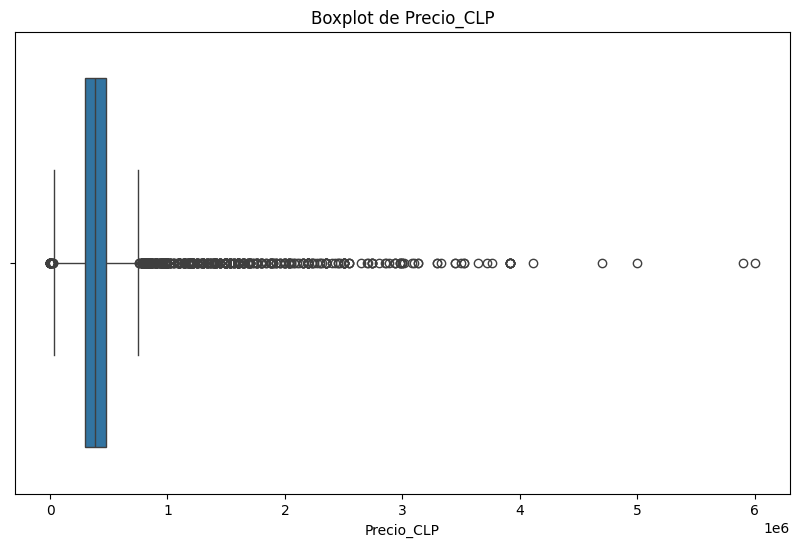

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Precio_CLP'])
plt.title('Boxplot de Precio_CLP')
plt.show()

## 5.2 Boxplot filtrando outliers

In [ ]:
# Limpieza opcional (elimina precios fuera de un rango razonable)
lower = df['Precio_CLP'].quantile(0.01)
upper = df['Precio_CLP'].quantile(0.99)
df_filtrado = df[(df['Precio_CLP'] > lower) & (df['Precio_CLP'] < upper)]


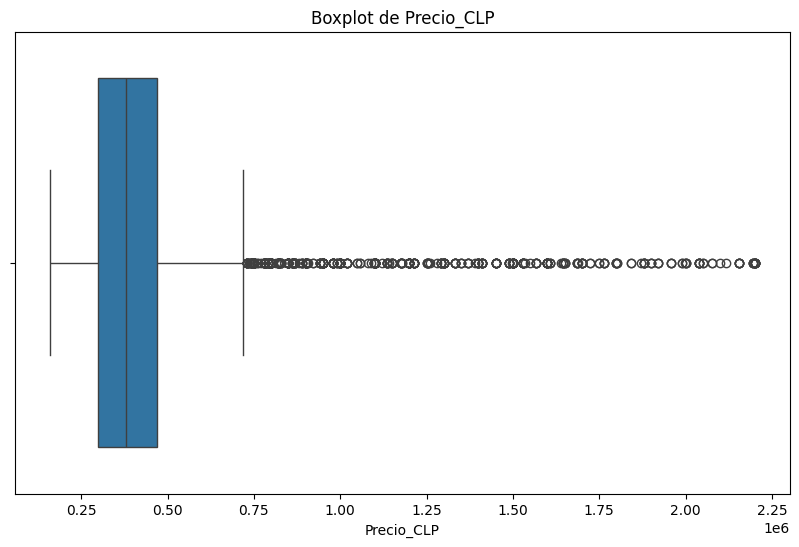

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtrado['Precio_CLP'])
plt.title('Boxplot de Precio_CLP')
plt.show()

##5.3 Histograma de precios

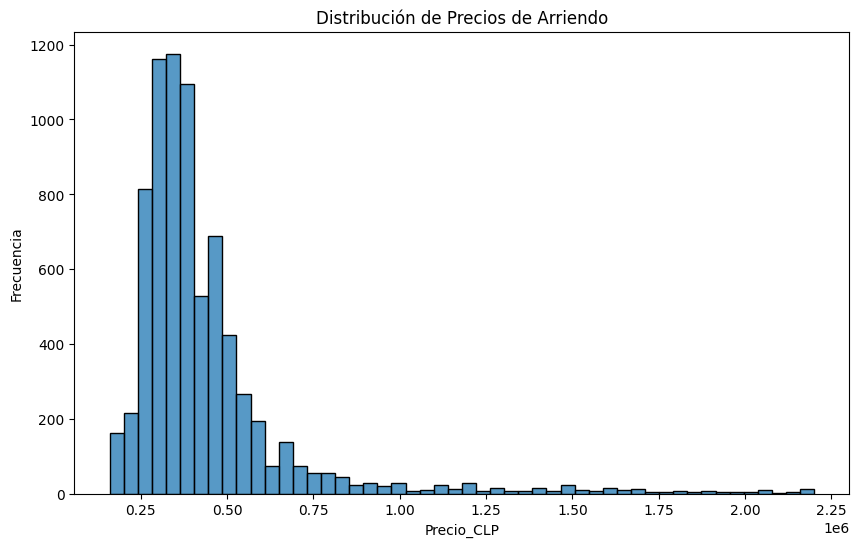

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_filtrado['Precio_CLP'], bins=50)
plt.title('Distribución de Precios de Arriendo')
plt.xlabel('Precio_CLP')
plt.ylabel('Frecuencia')
plt.show()

## 5.4 Precio promedio por comuna

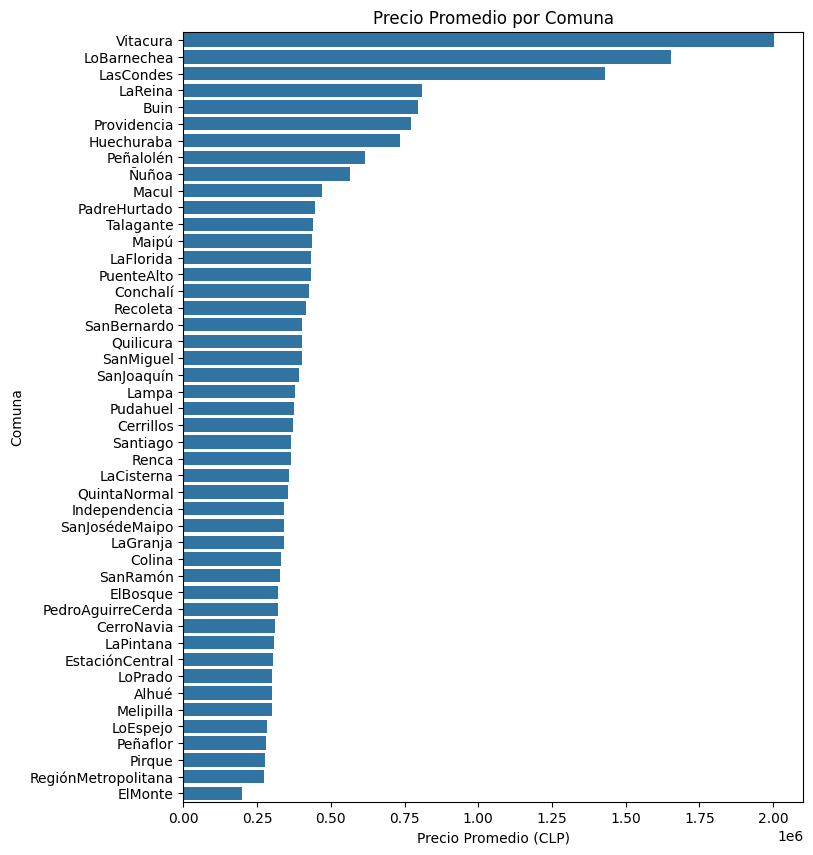

In [ ]:
plt.figure(figsize=(8, 10))
precio_promedio = df.groupby('Comuna')['Precio_CLP'].mean().sort_values(ascending=False)
sns.barplot(x=precio_promedio.values, y=precio_promedio.index)
plt.title('Precio Promedio por Comuna')
plt.xlabel('Precio Promedio (CLP)')
plt.show()

##5.5 Cantidad de propiedades por comuna

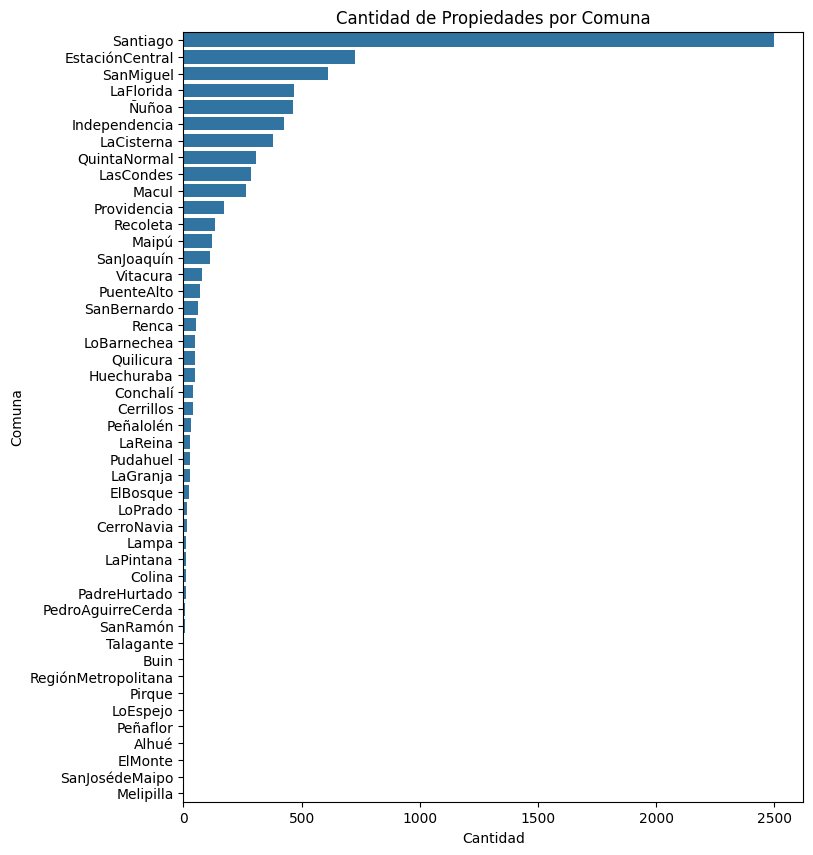

In [ ]:
plt.figure(figsize=(8, 10))
conteo_comuna = df['Comuna'].value_counts().sort_values(ascending=False)
sns.barplot(x=conteo_comuna.values, y=conteo_comuna.index)
plt.title('Cantidad de Propiedades por Comuna')
plt.xlabel('Cantidad')
plt.show()

## 5.6 Top 10 comunas mas caras por m2

In [ ]:
df['Precio_por_m2'] = df['Precio_CLP'] / df['Metros Cuadrados']

# Top 10 comunas más caras por m2
precio_por_m2_promedio = df.groupby('Comuna')['Precio_por_m2'].mean().sort_values(ascending=False).head(10)
precio_por_m2_promedio

,Precio_por_m2
Comuna,
LoBarnechea,23114.824800
LasCondes,16015.313935
Vitacura,15333.769090
Providencia,12138.368316
LaReina,11338.418215
Ñuñoa,10969.336052
Huechuraba,10211.606783
Conchalí,9886.555019
Macul,9148.702839


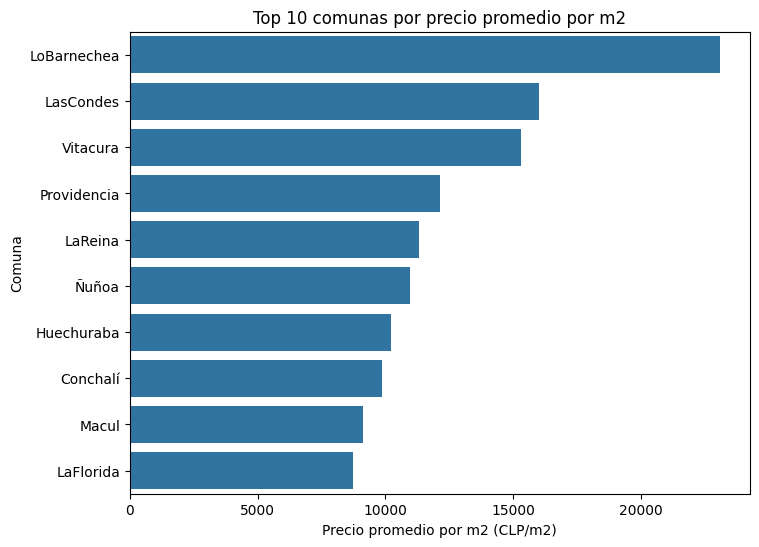

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=precio_por_m2_promedio.values, y=precio_por_m2_promedio.index)
plt.title('Top 10 comunas por precio promedio por m2')
plt.xlabel('Precio promedio por m2 (CLP/m2)')
plt.ylabel('Comuna')
plt.show()

##5.7 Matriz de correlación

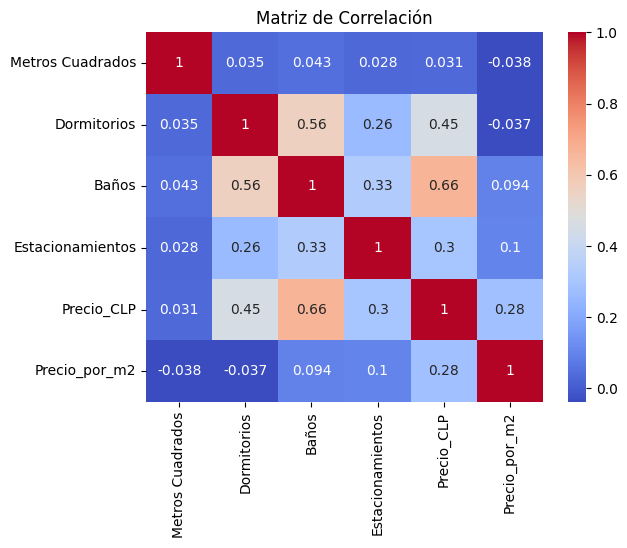

In [ ]:
corr = df.select_dtypes(include=['float64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7706 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Título            7706 non-null   object 
 1   Comuna            7706 non-null   object 
 2   Metros Cuadrados  7706 non-null   float64
 3   Dormitorios       7706 non-null   float64
 4   Baños             7706 non-null   float64
 5   Estacionamientos  7706 non-null   float64
 6   Precio_CLP        7706 non-null   float64
 7   Metros_Imputados  7706 non-null   bool   
 8   Precio_por_m2     7706 non-null   float64
dtypes: bool(1), float64(6), object(2)
memory usage: 549.4+ KB


In [ ]:

#df.to_csv('Departamentos_RM_Web_Scrapped_YAPO_Limpio.csv', index=False)